# Libraries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
path = '/kaggle/input/california-housing-prices/housing.csv'
choice = input('Do you want to insert a path?(y/n)')
if(choice =='y' or choice == 'yes'):
    path=input('the new path is:\n>')

# Discover the Input

In [4]:
housing_df = pd.read_csv(path)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


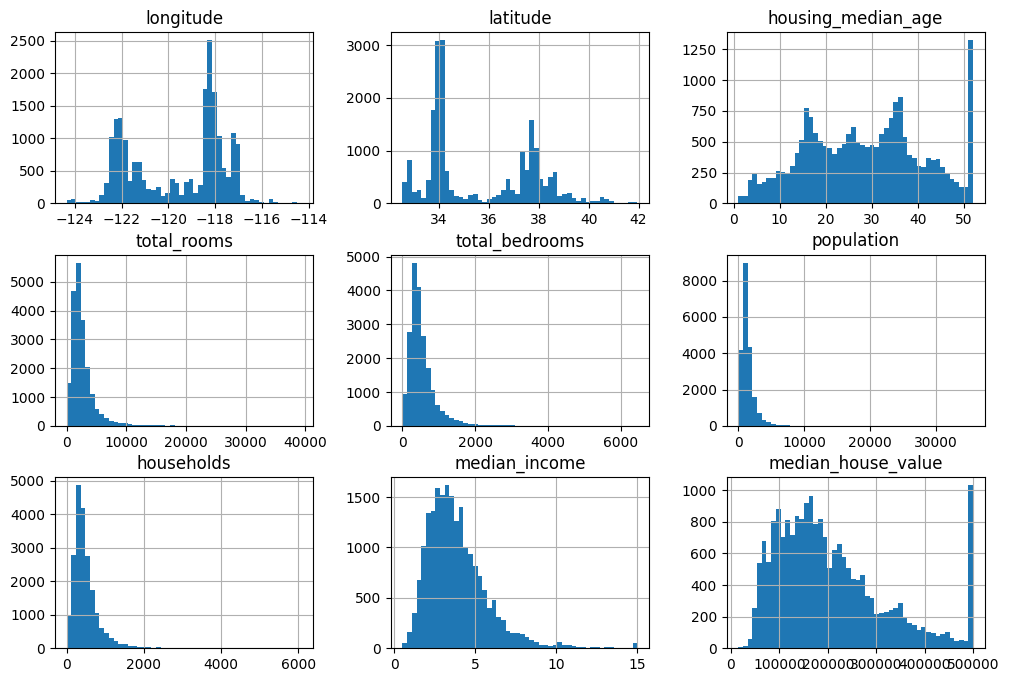

In [8]:
housing_df.hist(bins = 50, figsize=(12, 8))
plt.show()

# Explore Data & Get Insights

In [9]:
corr=housing_df.select_dtypes(include=np.number).corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


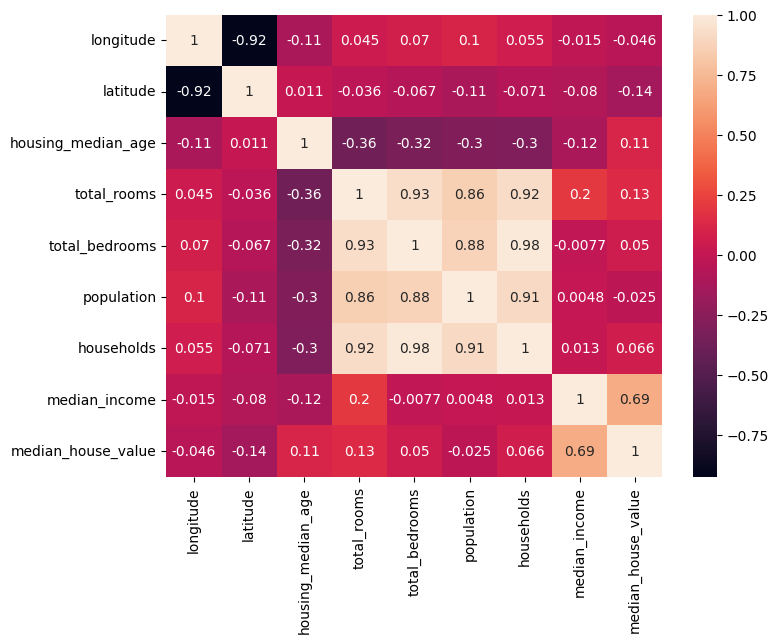

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)

plt.show()

In [11]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

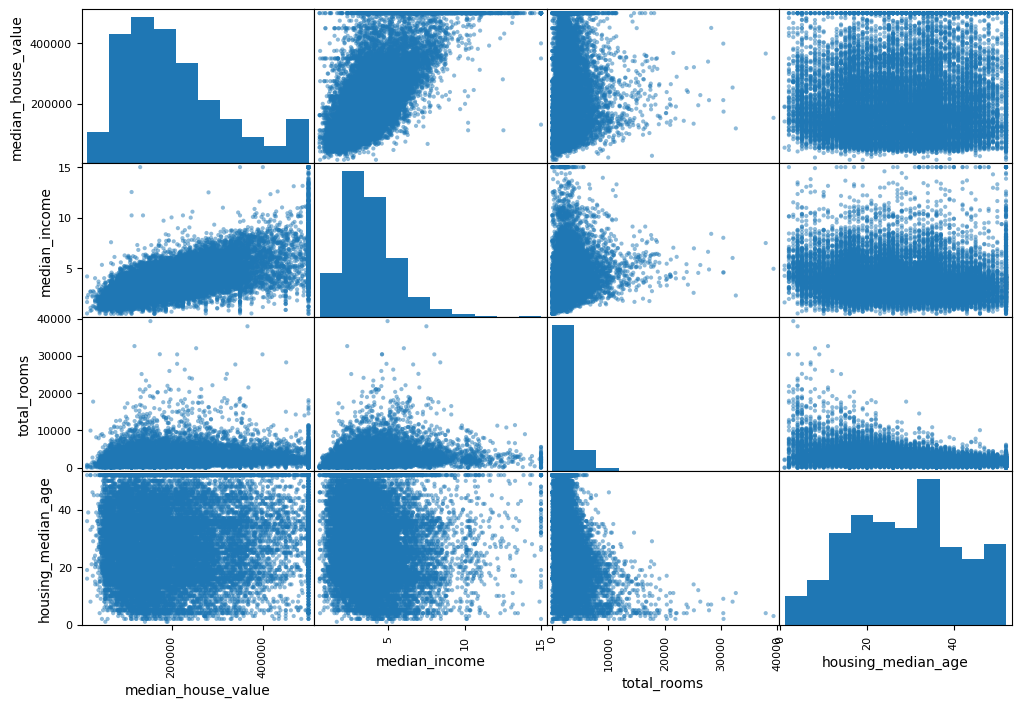

In [12]:
scatter_matrix(housing_df[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']], figsize=(12, 8))
plt.show()

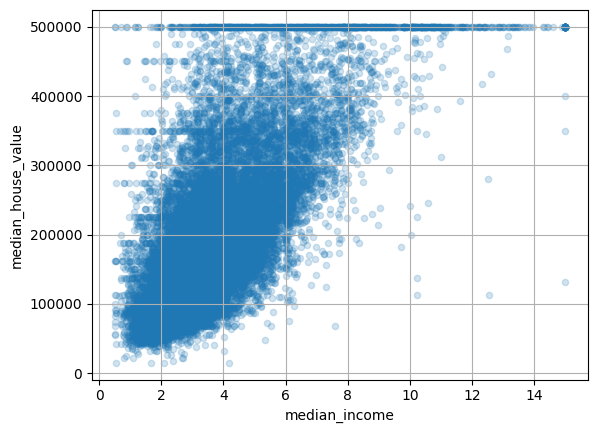

In [13]:
housing_df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, grid=True)
plt.show()

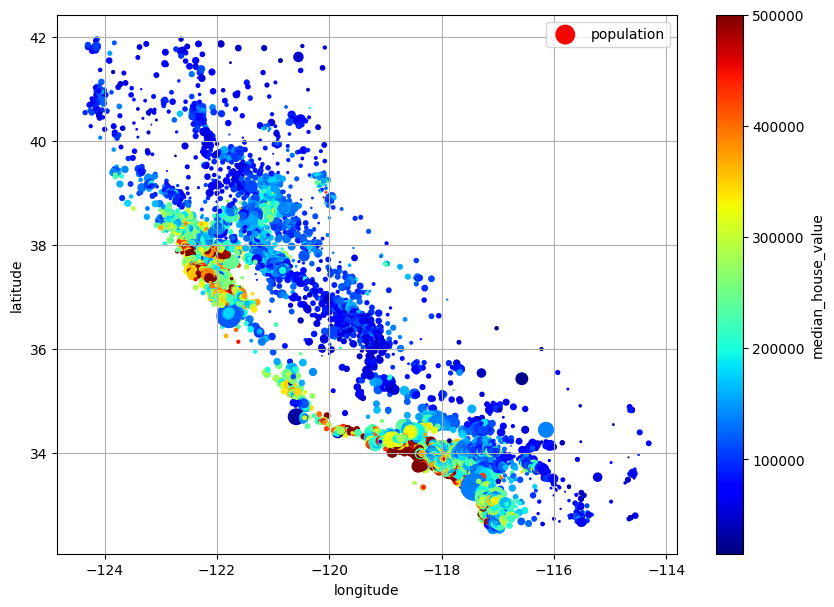

In [14]:
housing_df.plot(kind='scatter', x='longitude', y='latitude', grid=True, 
             s=housing_df['population']/100, label='population', c='median_house_value', 
             cmap='jet', colorbar=True, legend=True, sharex=False, figsize=(10, 7))

plt.show()

# Prepare Data For Model Training

In [15]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
housing_df['rooms_per_house'] = housing_df['total_rooms']/housing_df['households']
housing_df['bedrooms_ratio'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['people_per_house'] = housing_df['population']/housing_df['households']

In [17]:
corr=housing_df.select_dtypes(include=np.number).corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

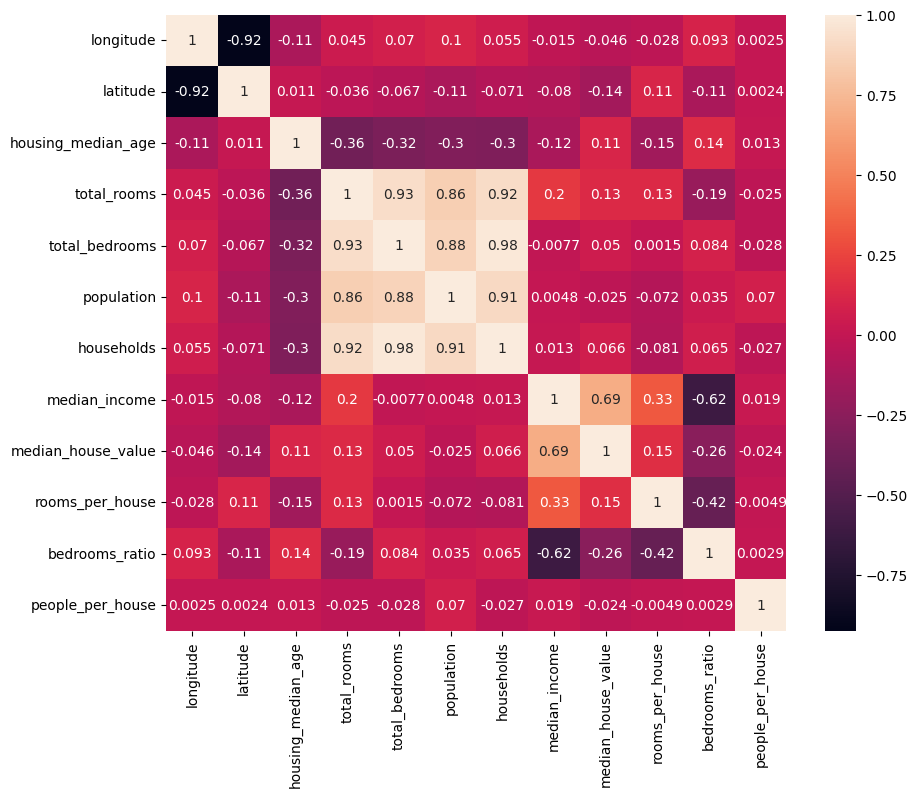

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

In [19]:
housing_df.drop(columns=['total_bedrooms', 'population', 'households'], inplace=True)

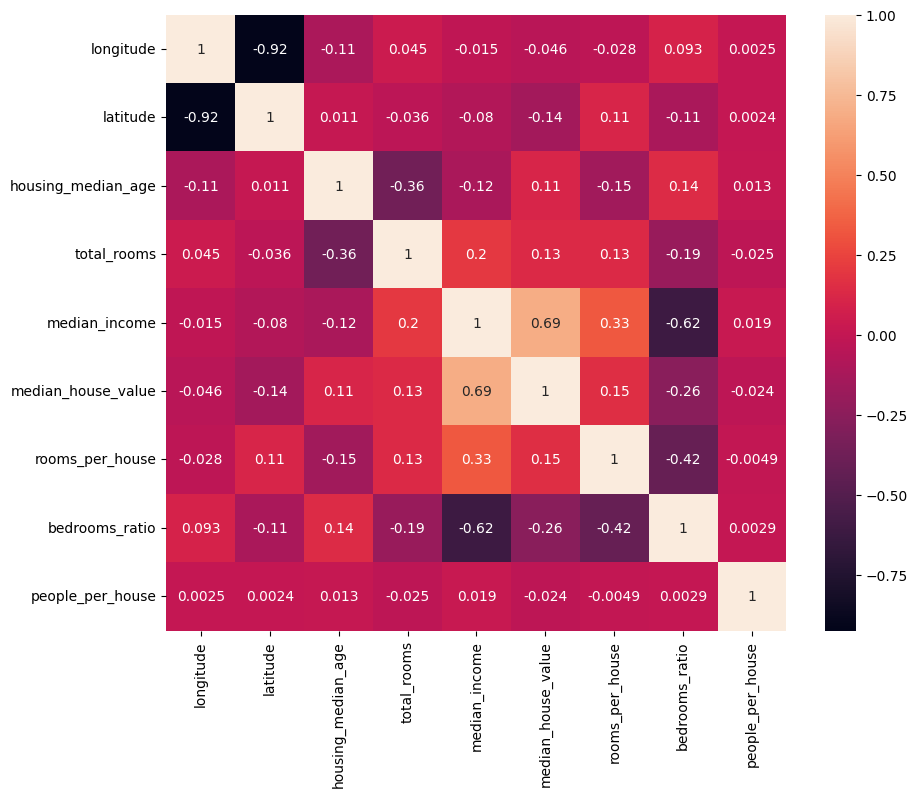

In [20]:
corr=housing_df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

In [21]:
housing_df['income_cat'] = pd.cut(housing_df['median_income'], 
                                 bins = [0. , 1.5 , 3.0 , 4.5 , 6, np.inf], 
                                 labels = [1, 2, 3, 4, 5])

In [22]:
housing_df['income_cat'].value_counts(normalize=True)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: proportion, dtype: float64

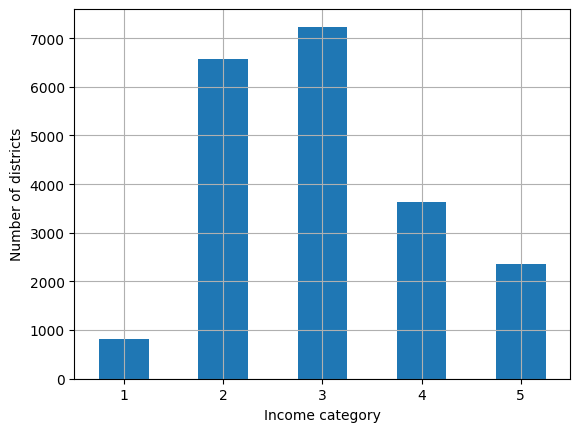

In [23]:
housing_df['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid = True)
plt.xlabel("Income category")
plt.ylabel('Number of districts')
plt.show()

# Get the Data Ready for the Model

In [24]:
train_set, test_set = train_test_split(housing_df, test_size = 0.2, stratify = housing_df['income_cat'], random_state = 42)

In [25]:
train_set['income_cat'].value_counts(normalize=True)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: proportion, dtype: float64

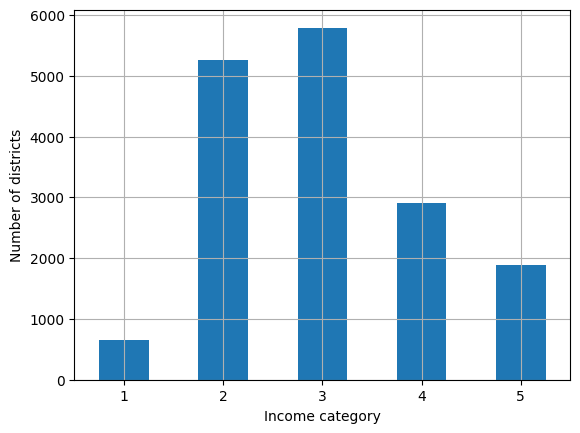

In [26]:
train_set['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid = True)
plt.xlabel("Income category")
plt.ylabel('Number of districts')
plt.show()

In [27]:
test_set['income_cat'].value_counts(normalize=True)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64

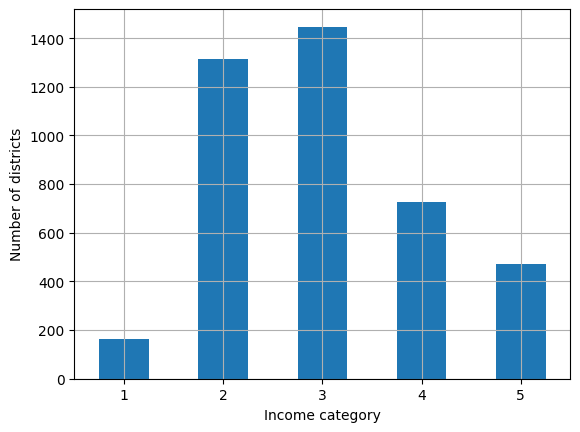

In [28]:
test_set['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid = True)
plt.xlabel("Income category")
plt.ylabel('Number of districts')
plt.show()

In [29]:
for set_ in (train_set, test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Remove null and Duplicates

In [30]:
housing = train_set.copy()

In [31]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
median_income           0
median_house_value      0
ocean_proximity         0
rooms_per_house         0
bedrooms_ratio        158
people_per_house        0
dtype: int64

In [32]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
12655,-121.46,38.52,29.0,3873.0,2.1736,72100.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,6.3373,279600.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,2.8750,82700.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,2.2264,112500.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,4.4964,238300.0,6.096552,0.182692,3.167241


In [33]:
imputer = SimpleImputer(strategy='median')
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        3.54155000e+00,  1.79500000e+05,  5.23234164e+00,  2.03027043e-01,
        2.81766108e+00])

In [35]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        3.54155000e+00,  1.79500000e+05,  5.23234164e+00,  2.03027043e-01,
        2.81766108e+00])

In [36]:
X = imputer.transform(housing_num)

In [37]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
12655,-121.46,38.52,29.0,3873.0,2.1736,72100.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,6.3373,279600.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,2.8750,82700.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,2.2264,112500.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,4.4964,238300.0,6.096552,0.182692,3.167241


In [38]:
housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
median_income         0
median_house_value    0
rooms_per_house       0
bedrooms_ratio        0
people_per_house      0
dtype: int64

In [39]:
housing_tr.duplicated().sum()

0

## Encode Categorical Data

In [40]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [41]:
cat_encoder = OneHotEncoder()
housing_cat_encoded = cat_encoder.fit_transform(housing_cat)
housing_cat_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [42]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
housing_en= pd.DataFrame(housing_cat_encoded.toarray(), columns = cat_encoder.get_feature_names_out(), index=housing_cat.index)
housing_en.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0


In [44]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [45]:
pd.DataFrame(numeric_pipeline.fit_transform(housing_num), columns = numeric_pipeline.get_feature_names_out(), index=housing_num.index)

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
12655,-0.941350,1.347438,0.027564,0.584777,-0.893647,-1.166015,0.017395,-0.122484,0.006223
15502,1.171782,-1.192440,-1.722018,1.261467,1.292168,0.627451,0.569256,-0.911663,-0.040811
2908,0.267581,-0.125972,1.220460,-0.469773,-0.525434,-1.074397,-0.018024,-0.370939,-0.075371
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.865929,-0.816829,-0.595140,1.115873,-0.106803
20496,0.437431,-0.635818,-0.131489,0.427179,0.325752,0.270486,0.251241,-0.526821,0.006109
...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,0.637374,0.531511,0.466353,-0.491732,-0.092580
12661,-0.921368,1.342761,-1.085806,2.468471,-0.557509,-1.007844,0.050362,-0.574363,0.023024
19263,-1.570794,1.310018,1.538566,-0.895802,-0.365475,-0.575684,-0.509240,0.385514,-0.037436
19140,-1.560803,1.249211,-1.165333,0.249005,0.168261,0.441622,0.328149,-0.506808,-0.059156


In [46]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

In [47]:
pd.DataFrame(categorical_pipeline.fit_transform(housing_cat).toarray(), columns = categorical_pipeline.get_feature_names_out(), index=housing_cat.index)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
15174,1.0,0.0,0.0,0.0,0.0
12661,0.0,1.0,0.0,0.0,0.0
19263,1.0,0.0,0.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0


In [48]:
num_attrs = housing_num.columns.drop('median_house_value')
cat_attrs = housing_cat.columns

In [49]:
preprocessing = ColumnTransformer([
    ('numeric', numeric_pipeline, num_attrs),
    ('categorical', categorical_pipeline, cat_attrs),
])

In [50]:
X_train, y_train = train_set.drop(columns=['median_house_value']), train_set['median_house_value']
X_test, y_test = test_set.drop(columns=['median_house_value']), test_set['median_house_value']

In [51]:
model = make_pipeline(preprocessing, LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'median_income', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [52]:
y_predict = model.predict(X_train)

In [53]:
score = model.score(X_train, y_train)
score

0.6266174137103122

In [54]:
mean_squared_error(y_train, y_predict, squared=False)

70697.1826079673

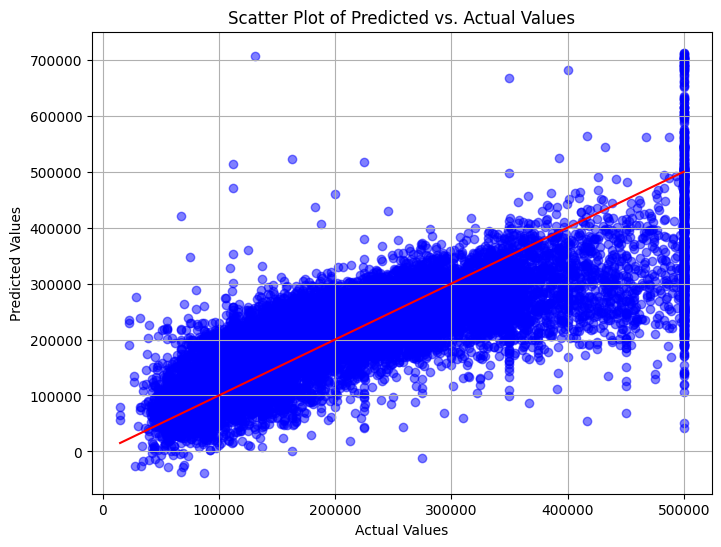

In [55]:
import matplotlib.pyplot as plt

# Assuming y_actual and y_predicted are NumPy arrays or lists containing actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_predict, color='blue', alpha=0.5) 
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.grid(True)
plt.show()


In [56]:
residuals = y_train - y_predict

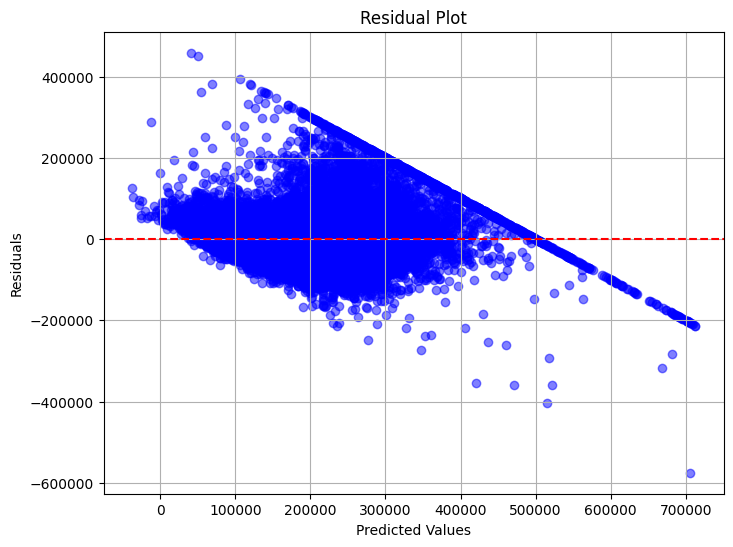

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='blue', alpha=0.5)  # Scatter plot
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

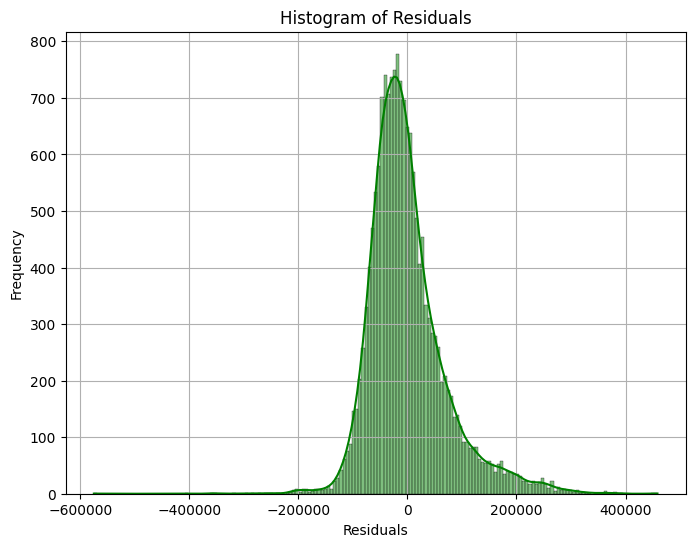

In [58]:
# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()


# Test Model Generalization

In [59]:
test_predict = model.predict(X_test)

In [60]:
score = model.score(X_test, y_test)
score

0.628913620310461

In [61]:
mean_squared_error(y_test, test_predict, squared=False)

69544.40671022896

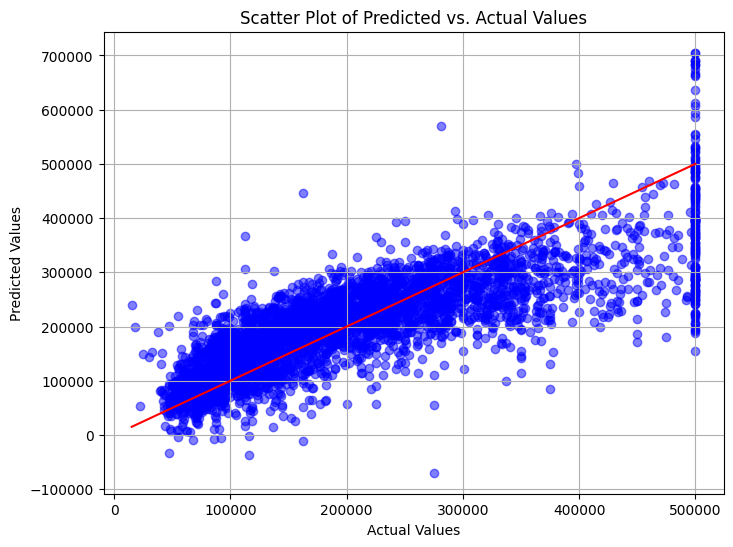

In [62]:
# Assuming y_actual and y_predicted are NumPy arrays or lists containing actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predict, color='blue', alpha=0.5) 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.grid(True)
plt.show()

In [63]:
test_residuals = y_test - test_predict

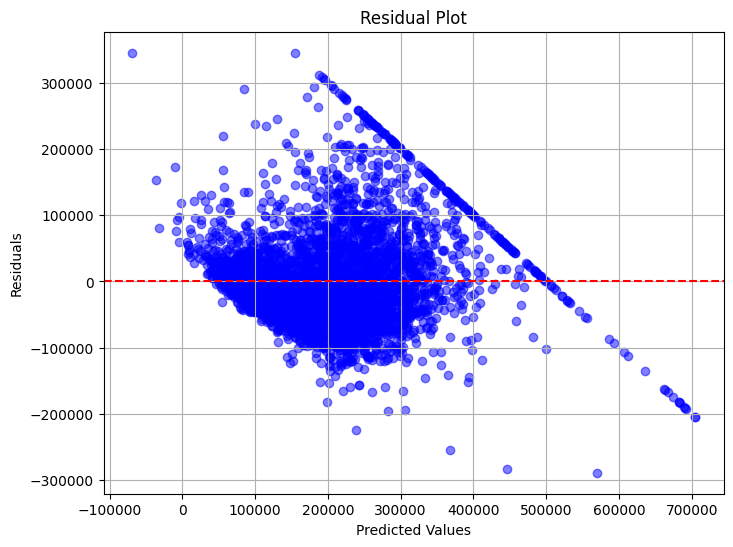

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(test_predict, test_residuals, color='blue', alpha=0.5)  # Scatter plot
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

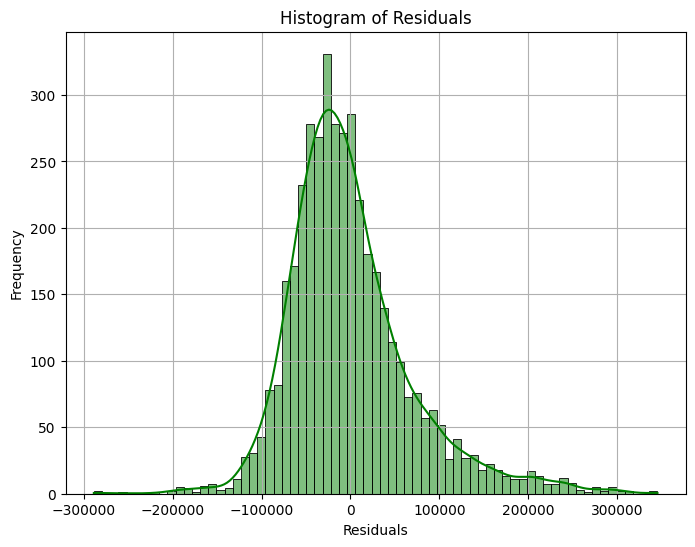

In [65]:
plt.figure(figsize=(8, 6))
sns.histplot(test_residuals, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()


# Ridge Model (Linear Regression with Regularization)

In [85]:
ridge_model = make_pipeline(preprocessing, Ridge())

In [91]:
para_grid=[
    {
        'ridge__alpha':[0.1, 0.001, 0.001, 0.0001]
    }
]

In [92]:
grid_search = GridSearchCV(ridge_model, para_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'median_income', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['ocean_proximity'], dtype='object'))])),
                                       ('ridge', Ridge())]),
             param_grid=[{'ridge__alpha': [0.1, 0.001, 0.001, 0.0001]}],
             scoring='neg_root_mean_squared_error')

In [93]:
grid_search.best_params_

{'ridge__alpha': 0.0001}

In [94]:
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032251,0.001270,0.006551,0.000153,0.1,{'ridge__alpha': 0.1},-70001.795795,-69521.417274,-71984.308827,-71716.386730,-70795.366299,-70803.854985,950.179241,4
1,0.034964,0.001439,0.007366,0.000667,0.001,{'ridge__alpha': 0.001},-70001.745681,-69521.422599,-71984.357638,-71716.432128,-70795.289267,-70803.849462,950.207250,2
2,0.033538,0.000723,0.007490,0.000572,0.001,{'ridge__alpha': 0.001},-70001.745681,-69521.422599,-71984.357638,-71716.432128,-70795.289267,-70803.849462,950.207250,2
3,0.035202,0.000660,0.008060,0.001225,0.0001,{'ridge__alpha': 0.0001},-70001.745227,-69521.422622,-71984.358091,-71716.432534,-70795.288573,-70803.849410,950.207512,1


In [97]:
best_ridge_model = make_pipeline(preprocessing, Ridge(alpha=0.0001))
best_ridge_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'median_income', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('ridge', Ridge(alpha=0.0001))])

In [98]:
score = best_ridge_model.score(X_train, y_train)
score

0.6266174137100398

In [99]:
test_score = best_ridge_model.score(X_test, y_test)
test_score

0.6289135950928495

### The Ridge model did not improve performance in any way